# Feature Selection Experiment

In [1]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('paper')


In [2]:
df_pollutants = pd.read_csv('../data/cached_air_pollution_data.csv')
df_climate = pd.read_csv('../data/cached_openweather_data.csv')

In [3]:
df_combined = df_climate.join(df_pollutants.set_index(['latitude', 'longitude']), on=['latitude', 'longitude'], how='left')
df_combined = df_combined.loc[:, df_combined.columns.difference(['no', 'nh3'])]

In [4]:
df_combined

,clouds_all,co,feels_like,humidity,latitude,longitude,no2,o3,pm10,pm2_5,pressure,so2,temp,temp_max,temp_min,timestamp,wind_deg,wind_speed
0,12.0,270.37,270.21,89.0,50.866580,-2.173528,15.25,31.83,4.98,4.33,1010.0,1.48,274.13,275.08,272.51,1701450000,13.0,3.80
1,12.0,270.37,270.21,89.0,50.875335,-2.173528,15.25,31.83,4.98,4.33,1010.0,1.48,274.13,275.08,272.51,1701450000,13.0,3.80
2,12.0,270.37,270.21,89.0,50.884090,-2.173528,15.25,31.83,4.98,4.33,1010.0,1.48,274.13,275.08,272.51,1701450000,13.0,3.80
3,12.0,270.37,270.21,89.0,50.892845,-2.173528,15.25,31.83,4.98,4.33,1010.0,1.48,274.13,275.08,272.51,1701450000,13.0,3.80
4,12.0,280.38,270.21,89.0,50.901600,-2.173528,20.22,25.75,5.79,5.02,1010.0,1.94,274.13,275.08,272.51,1701450000,13.0,3.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,20.0,270.37,270.77,77.0,52.573809,0.312971,10.37,34.69,1.61,0.95,1010.0,0.56,273.28,274.27,272.96,1701450000,20.0,2.06
39996,20.0,270.37,270.77,77.0,52.582564,0.312971,10.37,34.69,1.61,0.95,1010.0,0.56,273.28,274.27,272.96,1701450000,20.0,2.06
39997,20.0,270.37,270.77,77.0,52.591319,0.312971,10.37,34.69,1.61,0.95,1010.0,0.56,273.28,274.27,272.96,1701450000,20.0,2.06
39998,20.0,270.37,270.77,77.0,52.600074,0.312971,10.37,34.69,1.61,0.95,1010.0,0.56,273.28,274.27,272.96,1701450000,20.0,2.06


In [5]:
df_corr = df_combined.corr().loc[df_climate.columns,df_pollutants.columns.difference(['no', 'nh3', 'latitude', 'longitude'])]

In [8]:
df_corr = df_corr.drop(columns=["timestamp"])

In [10]:
import matplotlib.pylab as pylab
fac = 12
params = {'legend.fontsize': f'{fac}',
          'figure.figsize': (15, 7),
         'axes.labelsize': f'{fac}',
         'axes.titlesize':f'{fac}',
         'xtick.labelsize':f'{fac}',
         'ytick.labelsize':f'{fac}',
          # 'title.size': '15'
          # 'figure.titlesize': '15' 
         }
pylab.rcParams.update(params)

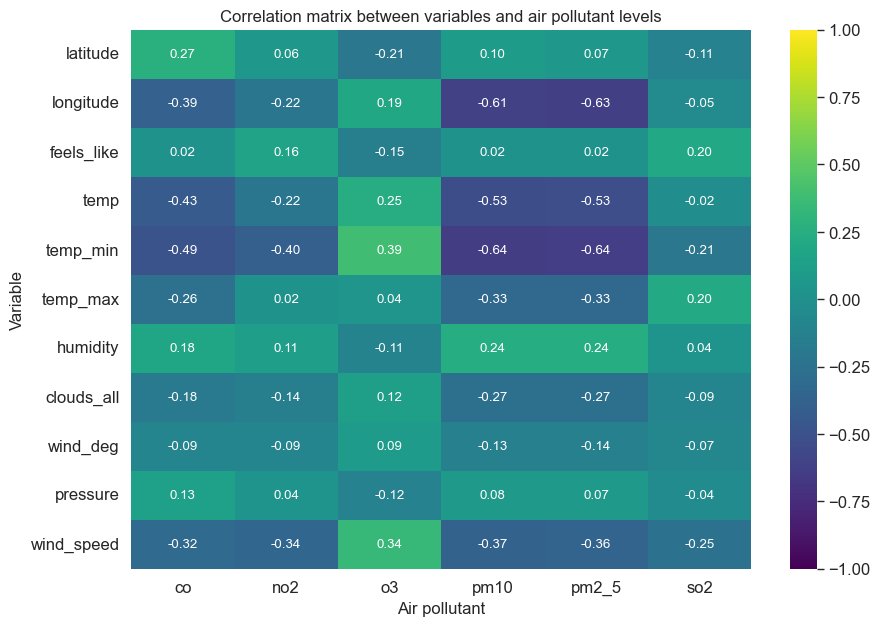

In [15]:

fig, ax = plt.subplots(1,1, figsize=(10,7))

df_corr_imputed = df_corr.fillna(df_corr.median())

# Create the heatmap with the imputed DataFrame
heatmap = sns.heatmap(df_corr_imputed, annot=True, vmin=-1,fmt=".2f",  vmax=1, cmap='viridis', ax=ax)
heatmap.set_title('Correlation matrix between variables and air pollutant levels')
ax.set_xlabel("Air pollutant")
ax.set_ylabel("Variable")
# Save the heatmap
plt.savefig('../figs/heatmap.pdf', bbox_inches='tight')
plt.savefig('../figs/heatmap.png', bbox_inches='tight')


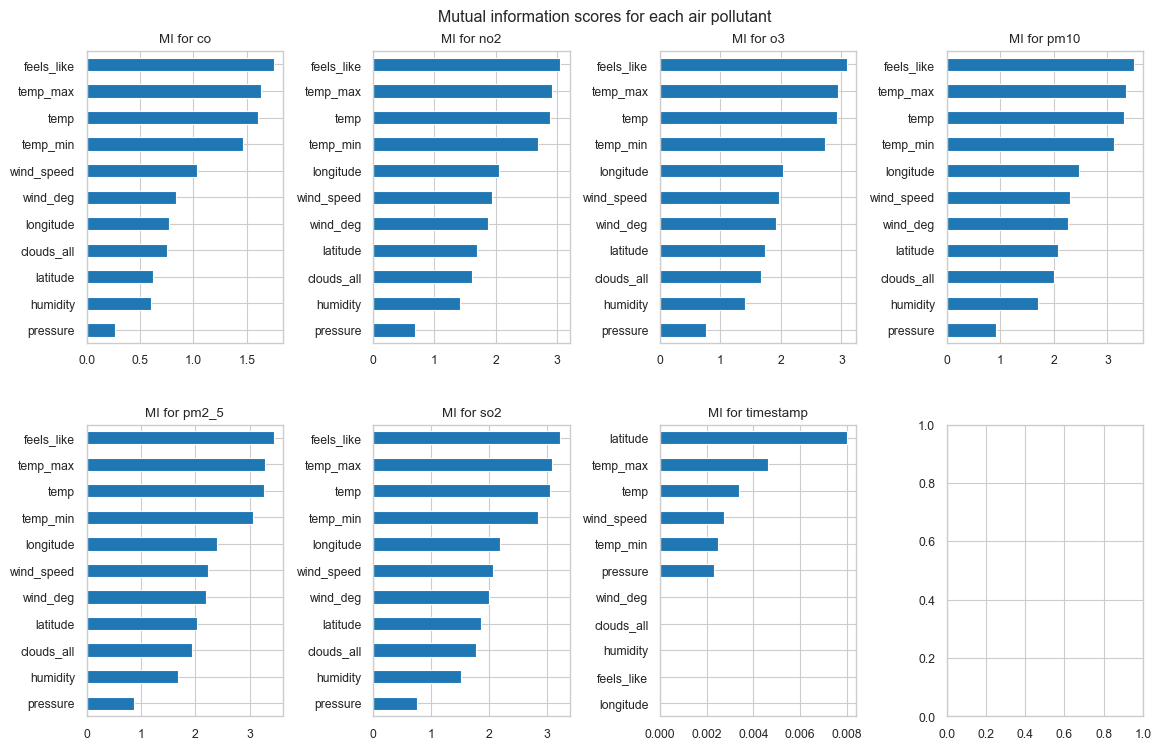

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
fig.tight_layout(pad=4.0)

axs = axs.flatten()

for i, target in enumerate(df_pollutants.columns.difference(['no', 'nh3', 'latitude', 'longitude'])):
	mi = mutual_info_regression(df_combined[df_climate.columns], df_combined[target])
	mutual_info = pd.Series(mi)
	mutual_info.index = df_climate.columns
	
	mutual_info.sort_values().plot.barh(title=f"MI for {target}", ax=axs[i])
fig.suptitle('Mutual information scores for each air pollutant')
fig.savefig('../figs/mutual_info.pdf')
fig.savefig('../figs/mutual_info.png')

In [12]:
climate_variables = [
    "feels_like",
    "temp_max",
    "temp",
    "temp_min",
    "wind_speed",
    "wind_deg",
    "clouds_all",
    "humidity",
    "pressure",

]

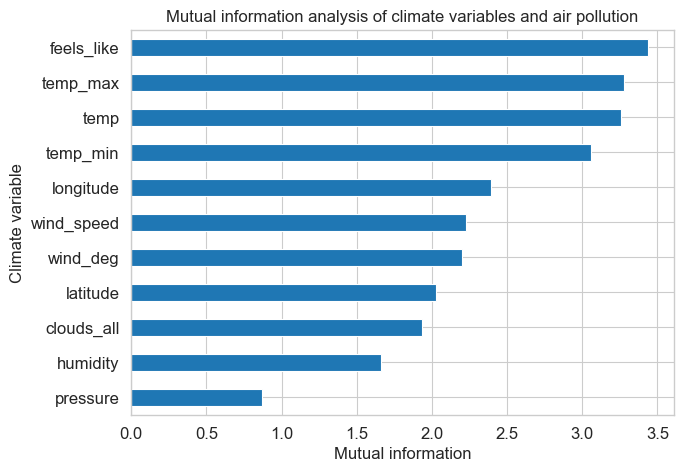

In [19]:
mi = mutual_info_regression(df_combined[df_climate.columns], df_pollutants['pm2_5'])
mutual_info = pd.Series(mi)
mutual_info.index = df_climate.columns
fig, ax = plt.subplots(1,1, figsize=(7,5))
mutual_info.sort_values().plot.barh()

ax.set_xlabel("Mutual information")
ax.set_ylabel("Variable")
ax.set_title("Mutual information analysis of different variables and air pollution")
plt.savefig("../figs/pm2_5_mi.pdf", bbox_inches='tight')
plt.savefig("../figs/pm2_5_mi.png", bbox_inches='tight')